### Instance to Datafile

In [312]:
inst = """

36
23
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 14
3 15
3 16
3 24
3 36
4 3
4 11
4 22
5 3
5 4
5 14
5 15
12 36

"""

In [313]:
list1 = list(reversed(inst.lstrip().rstrip().split('\n')))
out_inst = ""
out_inst += "width = "+list1.pop()+";\n"
out_inst += "n = "+list1.pop()+";\n"
out_inst += "dimensions = ["



for x in list1:

  x1 = x.split()
  out_inst += "|"+x1[0]+", "+x1[1]+"\n"

out_inst = out_inst[0:-1]
out_inst += "|];"
print(out_inst)

width = 36;
n = 23;
dimensions = [|12, 36
|5, 15
|5, 14
|5, 4
|5, 3
|4, 22
|4, 11
|4, 3
|3, 36
|3, 24
|3, 16
|3, 15
|3, 14
|3, 12
|3, 11
|3, 10
|3, 9
|3, 8
|3, 7
|3, 6
|3, 5
|3, 4
|3, 3|];


### Visualization

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import random

In [38]:
x_coordinates = [0, 34, 29, 24, 19, 19, 24, 29, 24, 30, 15, 15, 35, 19, 31, 23, 19, 27, 23, 27, 30, 36, 33, 15, 21, 24, 18, 24, 18]
y_coordinates = [0, 22, 27, 29, 30, 22, 23, 22, 19, 19, 24, 9, 10, 13, 11, 13, 8, 15, 10, 0, 0, 0, 1, 1, 1, 4, 3, 0, 0]
x_dimensions = [15, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
y_dimensions = [39, 18, 13, 11, 10, 8, 6, 5, 4, 3, 16, 15, 12, 9, 8, 6, 5, 4, 3, 15, 11, 10, 9, 8, 7, 6, 5, 4, 3]
minimum_height = 40

In [39]:
scale = 12

x_coordinates = [x*scale for x in x_coordinates]
y_coordinates = [x*scale for x in y_coordinates]
x_dimensions = [x*scale for x in x_dimensions]
y_dimensions = [x*scale for x in y_dimensions]


pos = list(zip(x_coordinates,y_coordinates))
vec = list(zip(x_dimensions,y_dimensions))

In [40]:
imx = sum(max(list(zip(x_coordinates,x_dimensions)), key= lambda i: i[0]+i[1]))
print(imx/scale)

39.0


In [41]:
imy = sum(max(list(zip(y_coordinates,y_dimensions)), key= lambda i: i[0]+i[1]))
print(imy/scale)

40.0


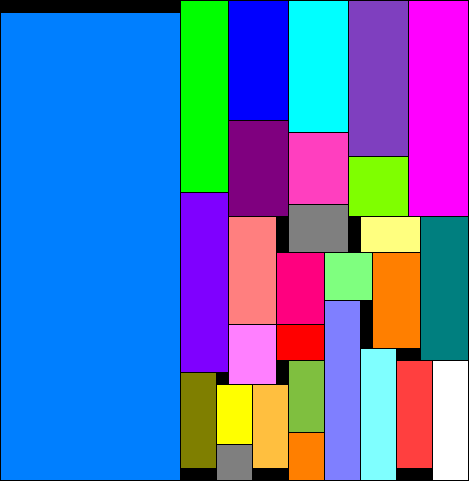

In [42]:
from PIL import Image, ImageDraw, ImageFont
import os


im = Image.new('RGB', (imx+1, imy+1), (0, 0, 0))
draw = ImageDraw.Draw(im)


colors = [(255,255,255), (255,0,0), (0,255,0) , (0,0,255), (255,255,0), (255,0,255), (0,255,255) ]


for x in colors[0:8]:
  for y in colors[0:8]:
    new_col = (int((x[0]+y[0])/2),int((x[1]+y[1])/2),int((x[2]+y[2])/2))
    if new_col not in colors:
      colors.append(new_col)

colorcs = colors[:]

for i in range(len(pos)):
  xcord = x_coordinates[i]
  ycord = y_coordinates[i]

  xdim = x_dimensions[i]
  ydim = y_dimensions[i]



  if len(colorcs) <= 2:
      colorcs = colors[:]

  clr = random.choice(colorcs)
  colorcs.remove(clr)



  draw.rectangle((xcord, ycord, xcord+xdim, ycord+ydim), fill=clr, outline=(0, 0, 0))
  

  
im.transpose(Image.FLIP_TOP_BOTTOM)


[0, 10, 20, 30, 40, 50, 70, 80, 90, 100, 110, 120]
[0, 10, 20, 30, 40, 50, 70, 80, 90, 100, 110]
[0, 10, 20, 30, 40, 50, 70, 80, 90, 100]
[0, 10, 20, 30, 40, 50, 70, 80, 100]
[0, 10, 20, 30, 40, 70, 80, 100]
[0, 10, 20, 40, 70, 80, 100]
[0, 10, 20, 40, 70, 80]
[0, 10, 20, 70, 80]
[0, 10, 20, 80]
[0, 10, 20]
[0, 10, 20, 40, 50, 60, 70, 80, 90, 100, 110, 120]
[0, 10, 20, 40, 50, 70, 80, 90, 100, 110, 120]
[0, 10, 20, 50, 70, 80, 90, 100, 110, 120]
[0, 10, 50, 70, 80, 90, 100, 110, 120]
[0, 10, 50, 70, 90, 100, 110, 120]
[0, 10, 50, 70, 100, 110, 120]


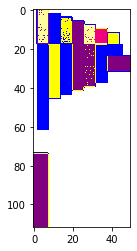

The max height is: 112 The max width is: 50


In [27]:
data = np.zeros((1000,1000))

bounds = [0,10,20,30,40,50,60,70,80,90,100,110,120]
boundcs = [0,10,20,30,40,50,60,70,80,90,100,110,120]

for i in range(len(pos)):
  xcord = x_coordinates[i]
  ycord = y_coordinates[i]

  xdim = x_dimensions[i]
  ydim = y_dimensions[i]

  if len(boundcs) == 3:
    boundcs = bounds
  
  choice  = random.choice(boundcs[2:])
  
  data[ycord:ycord + ydim, xcord:xcord + xdim] = choice

  boundcs.remove(choice)

  

  print(boundcs)



endx = sum(max(list(zip(x_coordinates,x_dimensions)), key= lambda i: i[0]+i[1]))
endy = sum(max(list(zip(y_coordinates,y_dimensions)), key= lambda i: i[0]+i[1]))
data = data[0:endy,0:endx]

data = np.flip(data, axis=0)

# create discrete colormap
cmap = colors.ListedColormap(['white', 'blue','green','yellow','red','purple','#7fc97f', '#ffff99',
              '#386cb0', '#f0027f'])

norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

#draw gridlines
#ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
#ax.set_xticks(np.arange(-.5, endx, 1));
#ax.set_yticks(np.arange(-.5, endy, 1));

plt.show()


print("The max height is:", endy,"The max width is:", endx)